## Importing Libaries and Reading the Excel File

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings('ignore')

In [68]:
df = pd.read_csv("CSV/IMDB_Movies.csv")
pd.set_option('display.max_columns', None)

In [69]:
df

color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross                           genres  \
0                     1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                    40000.0  309404152.0         Action|Adventure|Fantasy   
2                    11000.0  200074175.0        Action|Adventure|Thriller   
3                    27000.0  448130642.0                  Action|Thriller   
4                      131.0          NaN                      Documentary   
...                      ...          ...                              ...   
5038                   637.0          NaN                     Comedy|Drama   
5039                   841.0          NaN     Crime|Drama|Mystery|Thriller   
5040                     0.0          NaN            Drama|Horror|Thriller   
5041                   946.0      10443.0             Comedy|Drama|Romance   
5042                    86.0      85222.0                      Documentary   

         actor_1_name                                        movie_title  \
0         CCH Pounder                                            Avatar    
1         Johnny Depp          Pirates of the Caribbean: At World's End    
2     Christoph Waltz                                           Spectre    
3           Tom Hardy                             The Dark Knight Rises    
4         Doug Walker  Star Wars: Episode VII - The Force Awakens    ...   
...               ...                                                ...   
5038      Eric Mabius                           Signed Sealed Delivered    
5039      Natalie Zea                         The Following                
5040      Eva Boehnke                              A Plague So Pleasant    
5041        Alan Ruck                                  Shanghai Calling    
5042      John August                                 My Date with Drew    

      num_voted_users  cast_total_facebook_likes          actor_3_name  \
0              886204                       4834             Wes Studi   
1              471220                      48350        Jack Davenport   
2              275868                      11700      Stephanie Sigman   
3             1144337                     106759  Joseph Gordon-Levitt   
4                   8                        143                   N

In [70]:
df.shape

(5043, 28)

In [71]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [72]:
df.drop(['plot_keywords','movie_imdb_link'],axis=True,inplace=True)

In [73]:
df.shape

(5043, 26)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Treating Unwanted Values

#### Checking Unique Value of each datatype

In [75]:
for i in df.columns:
    if df[i].dtypes=='object':
        print(i,':',df[i].unique())

color : ['Color' nan ' Black and White']
director_name : ['James Cameron' 'Gore Verbinski' 'Sam Mendes' ... 'Scott Smith'
 'Benjamin Roberds' 'Daniel Hsia']
actor_2_name : ['Joel David Moore' 'Orlando Bloom' 'Rory Kinnear' ... 'Valorie Curry'
 'Maxwell Moody' 'Brian Herzlinger']
genres : ['Action|Adventure|Fantasy|Sci-Fi' 'Action|Adventure|Fantasy'
 'Action|Adventure|Thriller' 'Action|Thriller' 'Documentary'
 'Action|Adventure|Sci-Fi' 'Action|Adventure|Romance'
 'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance'
 'Adventure|Family|Fantasy|Mystery' 'Action|Adventure'
 'Action|Adventure|Western' 'Action|Adventure|Family|Fantasy'
 'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi' 'Adventure|Fantasy'
 'Action|Adventure|Drama|History' 'Adventure|Family|Fantasy'
 'Action|Adventure|Drama|Romance' 'Drama|Romance'
 'Action|Adventure|Sci-Fi|Thriller' 'Action|Adventure|Fantasy|Romance'
 'Action|Adventure|Fantasy|Sci-Fi|Thriller'
 'Adventure|Animation|Comedy|Family|Fantasy'
 'Adventure|Anim

In [76]:
for i in df.columns:
    if df[i].dtypes=='float64':
        print(i,':',df[i].unique())

num_critic_for_reviews : [723. 302. 602. 813.  nan 462. 392. 324. 635. 375. 673. 434. 403. 313.
 450. 733. 258. 703. 448. 451. 422. 599. 343. 509. 251. 446. 315. 516.
 377. 644. 750. 300. 608. 334. 376. 366. 378. 525. 495. 469. 304. 436.
 453. 424. 654. 539. 590. 338. 490. 306. 575. 428. 470. 298. 488. 322.
 421. 162. 367. 240. 384. 248. 284. 396. 645. 408. 219. 486. 682.  85.
 264. 418. 186. 585.  91. 250. 536. 370. 416. 401. 521.  10. 218. 576.
 226. 443. 188. 286. 288. 280. 653. 712. 642.   1. 187. 362. 500. 389.
 235. 231. 227. 275. 474. 228. 191. 329. 295. 318. 323. 276. 478. 167.
 185. 350. 245. 406. 739. 225. 145. 310. 526. 465. 357. 194. 339. 132.
 135. 256. 196. 220. 211. 464. 208. 287. 210. 432. 190. 314. 518. 291.
 292. 184. 141. 267. 351. 163. 166. 510. 197. 244. 156. 354.  21. 252.
 556. 153. 266. 517. 502. 165.  94. 246. 330. 440. 274. 349. 154. 233.
 271.   4. 294. 159. 289. 342. 382. 344. 183. 175. 239. 237. 262. 552.
 102. 775.  71. 476. 207. 492. 168. 283. 359. 320. 2

In [77]:
for i in df.columns:
    if df[i].dtypes=='int64':
        print(i,':',df[i].unique())

num_voted_users : [886204 471220 275868 ...  73839   1255   4285]
cast_total_facebook_likes : [ 4834 48350 11700 ...    93   690  2386]
movie_facebook_likes : [ 33000      0  85000 164000  24000  29000 118000  10000 197000   5000
  48000 123000  58000  40000  65000  56000  17000  83000  26000  72000
  44000 150000  80000  95000  60000  41000  30000  94000 129000  82000
  92000  22000 115000  23000  46000  20000  39000  16000  13000  54000
  37000  27000  42000   2000  77000  18000  53000  89000  45000    677
  35000  55000  67000  96000 349000 175000 166000  14000  38000  11000
   8000  15000  63000 191000  19000  47000  62000   3000  25000  51000
 190000   6000  61000  71000     40     25  52000  31000 122000  97000
    459  68000  28000    291 147000  12000   4000    304  36000    894
  21000    946 153000     53 199000 108000 138000 124000    881    416
    578  66000    701   1000   9000  70000    988    979    788  59000
    372    863  49000    941    374   7000  57000 140000    

In [78]:
df['num_user_for_reviews'].replace([' ', np.nan], [np.nan, np.nan], inplace=True)

In [79]:
df['num_voted_users']=df['num_voted_users'].astype('float64')
df['cast_total_facebook_likes']=df['cast_total_facebook_likes'].astype('float64')
df['movie_facebook_likes']=df['movie_facebook_likes'].astype('float64')
df['num_user_for_reviews']=df['num_user_for_reviews'].astype('float64')

## Checking Duplicates and Missing value Imputation

In [80]:
df.duplicated().sum()

45

In [81]:
df.drop_duplicates(inplace=True)

In [82]:
df.duplicated().sum()

0

In [83]:
df.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
num_user_for_reviews          21
language                      14
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [84]:
df.isnull().sum()/df.isnull().count().sort_values(ascending=True)

actor_1_facebook_likes       0.001401
actor_1_name                 0.001401
actor_2_facebook_likes       0.002601
actor_2_name                 0.002601
actor_3_facebook_likes       0.004602
actor_3_name                 0.004602
aspect_ratio                 0.065426
budget                       0.097439
cast_total_facebook_likes    0.000000
color                        0.003802
content_rating               0.060224
country                      0.001000
director_facebook_likes      0.020608
director_name                0.020608
duration                     0.003001
facenumber_in_poster         0.002601
genres                       0.000000
gross                        0.174870
imdb_score                   0.000000
language                     0.002801
movie_facebook_likes         0.000000
movie_title                  0.000000
num_critic_for_reviews       0.009804
num_user_for_reviews         0.004202
num_voted_users              0.000000
title_year                   0.021409
dtype: float

In [85]:
df['color'].fillna(df['color'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['content_rating'].fillna(df['content_rating'].mode()[0], inplace=True)
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median(), inplace=True)
df['duration'].fillna(df['duration'].median(), inplace=True)
df['director_facebook_likes'].fillna(df['director_facebook_likes'].median(), inplace=True)
df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].median(),inplace=True)
df['actor_1_facebook_likes'].fillna(df['actor_1_facebook_likes'].median(),inplace=True)
df['actor_2_facebook_likes'].fillna(df['actor_2_facebook_likes'].median(),inplace=True)
df['cast_total_facebook_likes'].fillna(df['cast_total_facebook_likes'].median(),inplace=True)
df['gross'].fillna(df['gross'].median(),inplace=True)
df['num_voted_users'].fillna(df['num_voted_users'].median(),inplace=True)
df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].median(), inplace=True)
df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace=True)
df['actor_2_facebook_likes'].fillna(df['actor_2_facebook_likes'].median(), inplace=True)
df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median(), inplace=True)

In [86]:
df.isnull().sum()

color                          0
director_name                103
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
num_user_for_reviews           0
language                      14
country                        0
content_rating                 0
budget                       487
title_year                   107
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [87]:
df.isnull().sum()[df.isnull().sum()!=0]

director_name    103
actor_2_name      13
actor_1_name       7
actor_3_name      23
language          14
budget           487
title_year       107
dtype: int64

In [88]:
df.dropna(inplace=True)

In [89]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [90]:
df.shape

(4477, 26)

## Statistical Information

In [91]:
df.describe().T

count          mean           std      min  \
num_critic_for_reviews     4477.0  1.477322e+02  1.227836e+02     1.00   
duration                   4477.0  1.088218e+02  2.282888e+01     7.00   
director_facebook_likes    4477.0  7.357188e+02  2.923913e+03     0.00   
actor_3_facebook_likes     4477.0  6.778796e+02  1.718509e+03     0.00   
actor_1_facebook_likes     4477.0  6.935830e+03  1.520669e+04     0.00   
gross                      4477.0  4.744125e+07  6.488857e+07   162.00   
num_voted_users            4477.0  9.091097e+04  1.436753e+05     5.00   
cast_total_facebook_likes  4477.0  1.026526e+04  1.852058e+04     0.00   
facenumber_in_poster       4477.0  1.369444e+00  2.029878e+00     0.00   
num_user_for_reviews       4477.0  2.934769e+02  3.911169e+02     1.00   
budget                     4477.0  3.998057e+07  2.077227e+08   218.00   
title_year                 4477.0  2.002272e+03  1.225757e+01  1927.00   
actor_2_facebook_likes     4477.0  1.760435e+03  4.206919e+03     0.00   
imdb_score                 4477.0  6.417668e+00  1.112024e+00     1.60   
aspect_ratio               4477.0  2.138640e+00  7.130528e-01     1.18   
movie_facebook_likes       4477.0  8.057326e+03  2.009875e+04     0.00   

                                   25%          50%          75%           max  
num_critic_for_reviews           58.00       118.00       203.00  8.130000e+02  
duration                         94.00       104.00       119.00  3.300000e+02  
director_facebook_likes           7.00        52.00       209.00  2.300000e+04  
actor_3_facebook_likes          149.00       388.00       650.00  2.300000e+04  
actor_1_facebook_likes          642.00      1000.00     11000.00  6.400000e+05  
gross                      10114315.00  25445749.00  56607223.00  7.605058e+08  
num_voted_users               11232.00     40346.00    106528.00  1.689764e+06  
cast_total_facebook_likes      1548.00      3287.00     14638.00  6.567300e+05  
facenumber_in_poster              0.00         1.00         2.00  4.300000e+01  
num_user_for_reviews             79.00       174.00       352.00  5.060000e+03  
budget                      6000000.00  20000000.00  45000000.00  1.221550e+10  
title_year                     1999.00      2005.00      2011.00  2.016000e+03  
actor_2_facebook_likes          308.00       624.00       938.00  1.370000e+05  
imdb_score                        5.80         6.50         7.20  9.300000e+00  
aspect_ratio                      1.85         2.35         2.35  1.600000e+01  
movie_facebook_likes              0.00       178.00      6000.00  3.490000e+05

In [92]:
df.corr(numeric_only=True)

num_critic_for_reviews  duration  \
num_critic_for_reviews                   1.000000  0.247928   
duration                                 0.247928  1.000000   
director_facebook_likes                  0.178891  0.172530   
actor_3_facebook_likes                   0.263942  0.125749   
actor_1_facebook_likes                   0.184949  0.082543   
gross                                    0.481262  0.244094   
num_voted_users                          0.619219  0.340575   
cast_total_facebook_likes                0.255972  0.118407   
facenumber_in_poster                    -0.035122  0.030932   
num_user_for_reviews                     0.599085  0.353020   
budget                                   0.119021  0.073500   
title_year                               0.299247 -0.142940   
actor_2_facebook_likes                   0.275103  0.132115   
imdb_score                               0.341934  0.355628   
aspect_ratio                             0.029126  0.032232   
movie_facebook_likes                     0.692146  0.216023   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                    0.178891                0.263942   
duration                                  0.172530                0.125749   
director_facebook_likes                   1.000000                0.121644   
actor_3_facebook_likes                    0.121644                1.000000   
actor_1_facebook_likes                    0.092970                0.255212   
gross                                     0.142087                0.293785   
num_voted_users                           0.298089                0.272399   
cast_total_facebook_likes                 0.121412                0.478634   
facenumber_in_poster                     -0.041649                0.100509   
num_user_for_reviews                      0.220098                0.218858   
budget                                    0.020832                0.045564   
title_year                               -0.064535                0.102112   
actor_2_facebook_likes                    0.119030                0.554905   
imdb_score                                0.177945                0.063264   
aspect_ratio                              0.000057                0.009829   
movie_facebook_likes                      0.160907                0.267776   

                           actor_1_facebook_likes     gross  num_voted_users  \
num_critic_for_reviews                   0.184949  0.481262         0.619219   
duration                                 0.082543  0.244094         0.340575   
director_facebook_likes                  0.092970  0.142087         0.298089   
actor_3_facebook_likes                   0.255212  0.293785         0.272399   
actor_1_facebook_likes                   1.000000  0.151407         0.188348   
gross                                    0.151407  1.000000         0.631850   
num_voted_users                          0.188348  0.631850         1.000000   
cast_total_facebook_likes                0.950872  0.236629         0.256314   
facenumber_in_poster                     0.068214 -0.030268        -0.033287   
num_user_for_reviews                     0.138979  0.559039         0.793781   
budget                                   0.022981  0.108324         0.078576   
title_year                               0.091816  0.056209         0.015796   
actor_2_facebook_likes                   0.398939  0.258001         0.257309   
imdb_score                               0.079626  0.199301         0.448365   
aspect_ratio                             0.012299  0.014892         0.008821   
movie_facebook_likes                     0.133450  0.374789         0.531093   

                           cast_total_facebook_likes  facenumber_in_poster  \
num_critic_for_reviews                      0.255972             -0.035122   
duration                                    0.118407              0.030932   
director_facebook_likes          

In [93]:
df.cov(numeric_only=True)

num_critic_for_reviews      duration  \
num_critic_for_reviews               1.507582e+04  6.949458e+02   
duration                             6.949458e+02  5.211577e+02   
director_facebook_likes              6.422339e+04  1.151634e+04   
actor_3_facebook_likes               5.569298e+04  4.933356e+03   
actor_1_facebook_likes               3.453242e+05  2.865487e+04   
gross                                3.834334e+09  3.615850e+08   
num_voted_users                      1.092362e+07  1.117069e+06   
cast_total_facebook_likes            5.820873e+05  5.006317e+04   
facenumber_in_poster                -8.753583e+00  1.433382e+00   
num_user_for_reviews                 2.876973e+04  3.152030e+03   
budget                               3.035636e+09  3.485406e+08   
title_year                           4.503754e+02 -3.999841e+01   
actor_2_facebook_likes               1.421020e+05  1.268825e+04   
imdb_score                           4.668717e+01  9.028061e+00   
aspect_ratio                         2.550006e+00  5.246726e-01   
movie_facebook_likes                 1.708075e+06  9.911840e+04   

                           director_facebook_likes  actor_3_facebook_likes  \
num_critic_for_reviews                6.422339e+04            5.569298e+04   
duration                              1.151634e+04            4.933356e+03   
director_facebook_likes               8.549269e+06            6.112333e+05   
actor_3_facebook_likes                6.112333e+05            2.953273e+06   
actor_1_facebook_likes                4.133723e+06            6.669419e+06   
gross                                 2.695798e+10            3.276041e+10   
num_voted_users                       1.252255e+08            6.725729e+07   
cast_total_facebook_likes             6.574786e+06            1.523384e+07   
facenumber_in_poster                 -2.471943e+02            3.506106e+02   
num_user_for_reviews                  2.517025e+05            1.471028e+05   
budget                                1.265286e+10            1.626501e+10   
title_year                           -2.312940e+03            2.150961e+03   
actor_2_facebook_likes                1.464146e+06            4.011753e+06   
imdb_score                            5.785822e+02            1.208994e+02   
aspect_ratio                          1.194878e-01            1.204471e+01   
movie_facebook_likes                  9.455999e+06            9.248936e+06   

                           actor_1_facebook_likes         gross  \
num_critic_for_reviews               3.453242e+05  3.834334e+09   
duration                             2.865487e+04  3.615850e+08   
director_facebook_likes              4.133723e+06  2.695798e+10   
actor_3_facebook_likes               6.669419e+06  3.276041e+10   
actor_1_facebook_likes               2.312434e+08  1.493993e+11   
gross                                1.493993e+11  4.210527e+15   
num_voted_users                      4.115081e+08  5.890664e+12   
cast_total_facebook_likes            2.678004e+08  2.843743e+11   
facenumber_in_poster                 2.105616e+03 -3.986741e+06   
num_user_for_reviews                 8.265878e+05  1.418787e+10   
budget                               7.259286e+10  1.460087e+15   
title_year                           1.711423e+04  4.470770e+07   
actor_2_facebook_likes               2.552145e+07  7.042934e+10   
imdb_score                           1.346497e+03  1.438110e+07   
aspect_ratio                         1.333558e+02  6.890195e+05   
movie_facebook_likes                 4.078691e+07  4.887925e+11   

                           num_voted_users  cast_total_facebook_likes  \
num_critic_for_reviews        1.092362e+07               5.820873e+05   
duration                      1.117069e+06               5.006317e+04   
director_facebook_likes       1.252255e+08               6.574786e+06   
actor_3_facebook_likes        6.725729e+07               1.523384e+07   
actor_1_facebook_likes        4.115081e+08             

## visualization

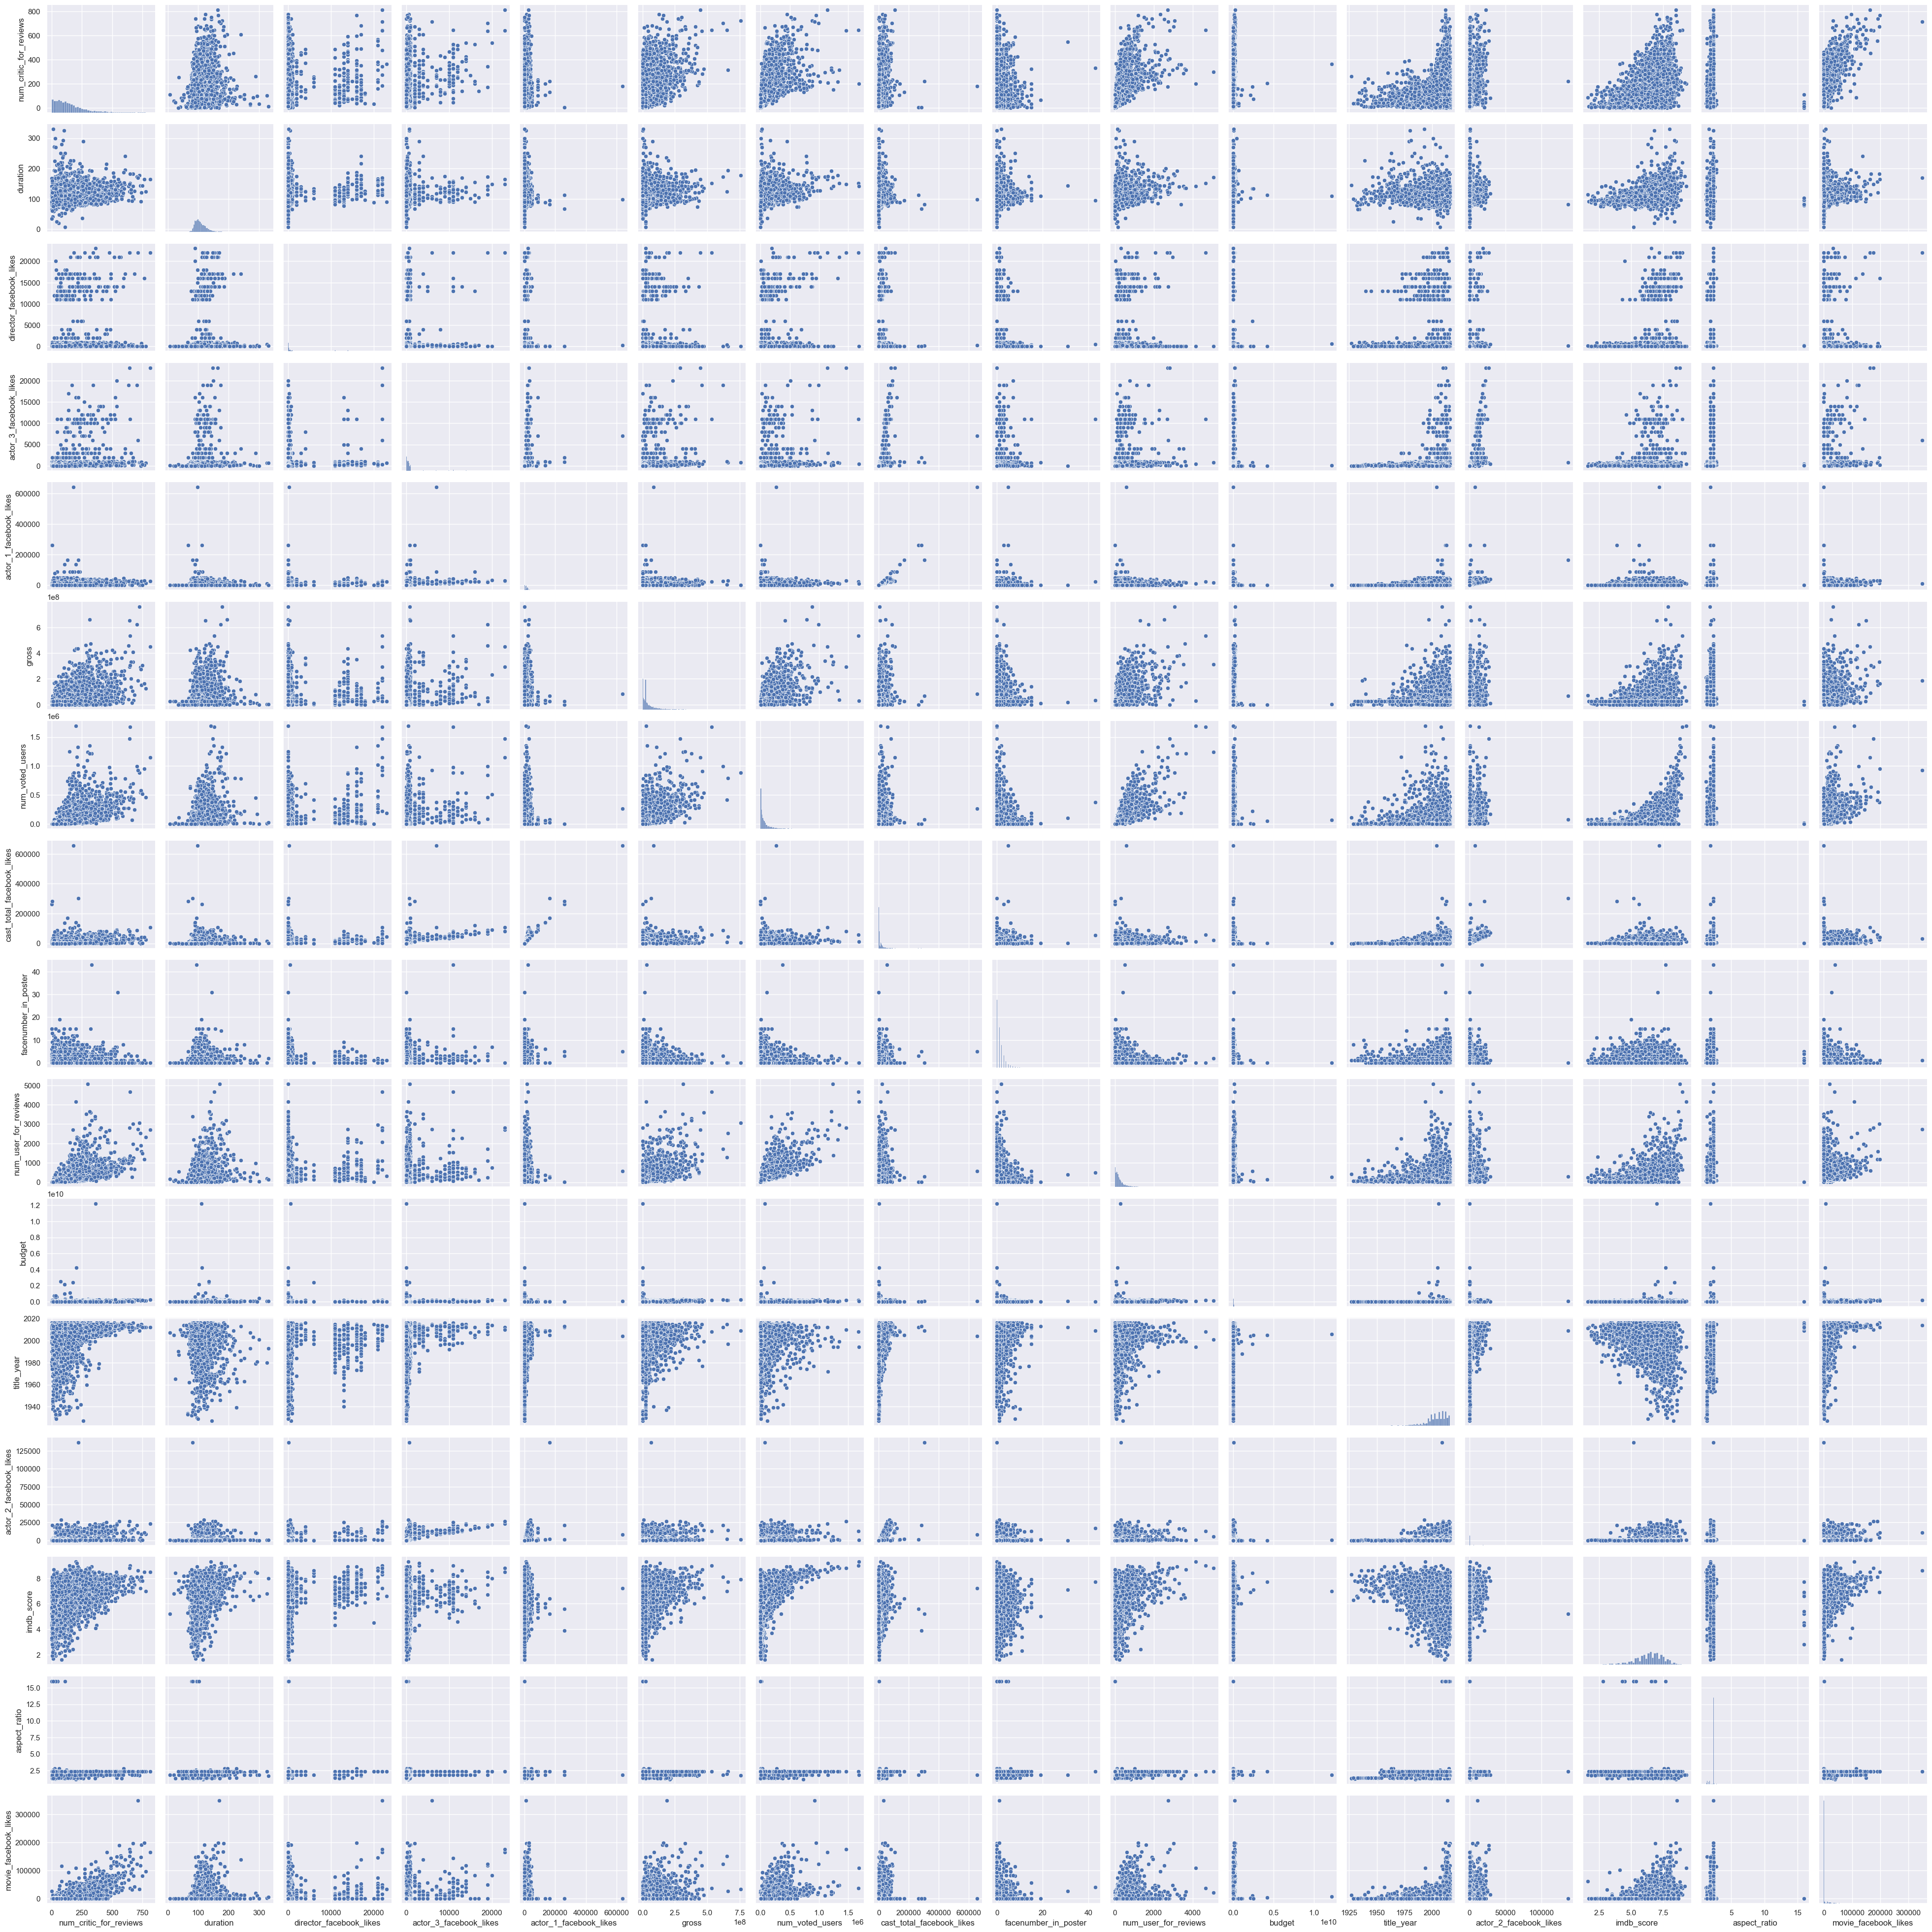

In [94]:
sns.pairplot(df)

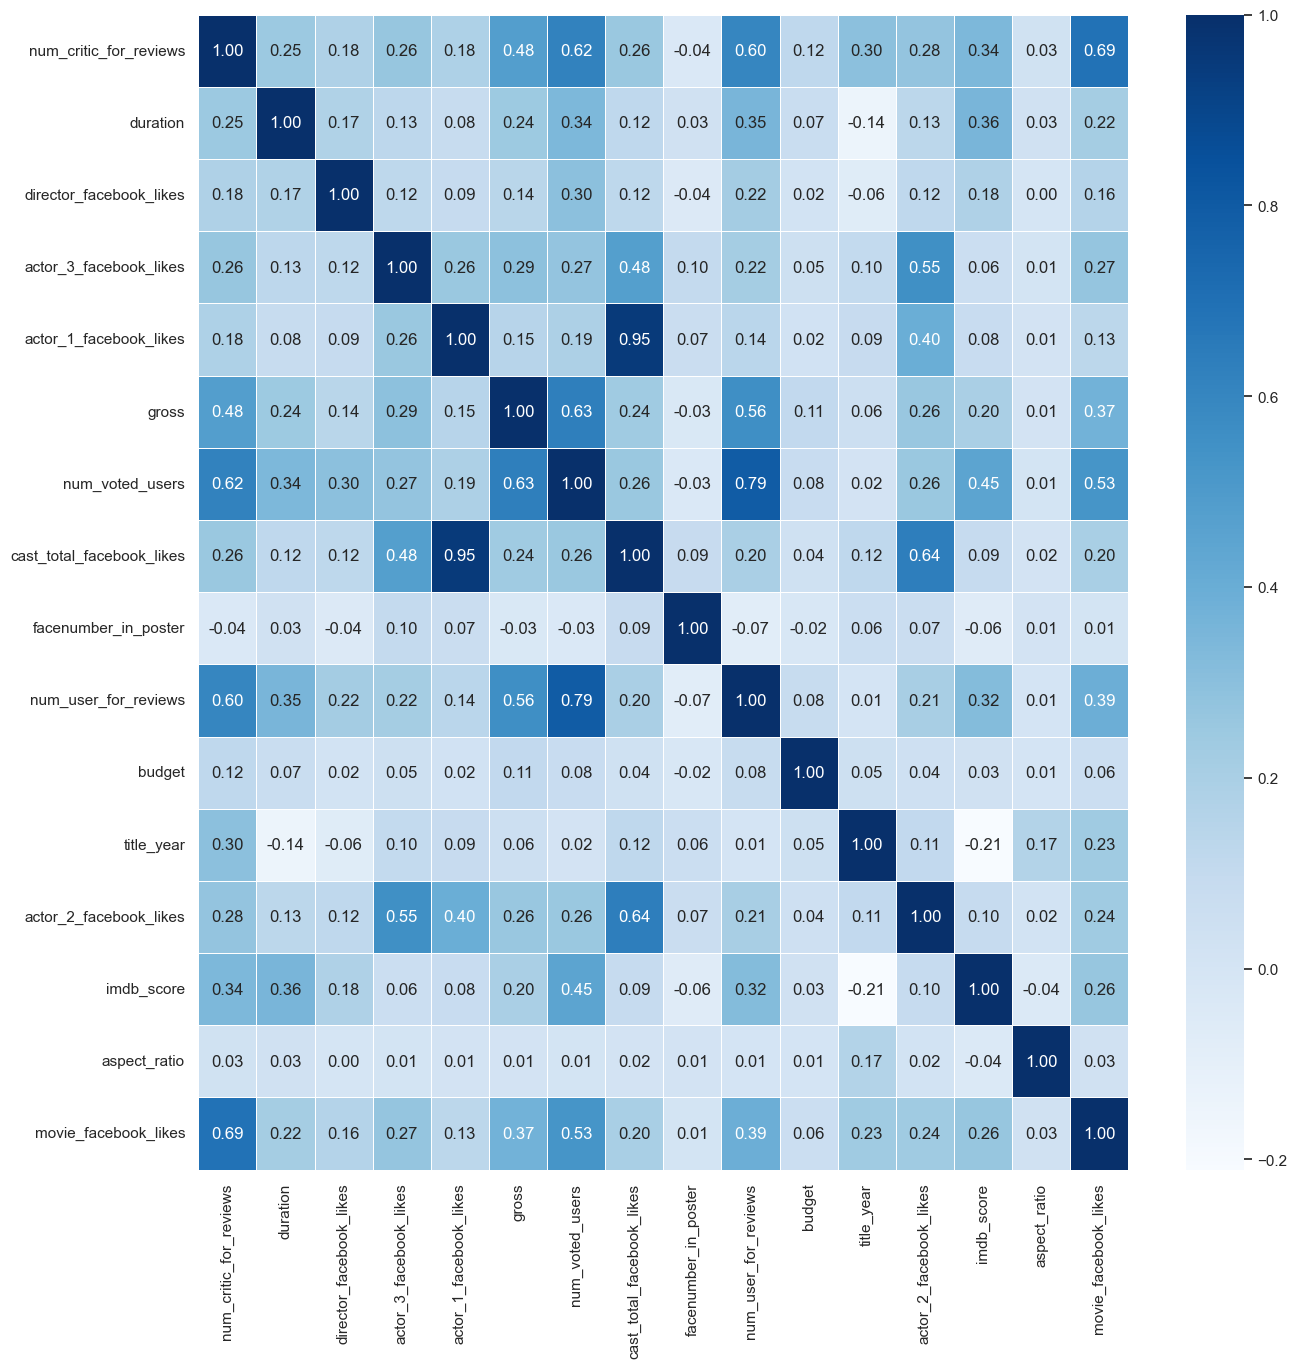

In [95]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2f", linewidth=.5)
plt.show()

## Checking for Data Distribution

In [96]:
df.skew(numeric_only=True)

num_critic_for_reviews        1.482357
duration                      2.229621
director_facebook_likes       5.002535
actor_3_facebook_likes        6.981758
actor_1_facebook_likes       19.576397
gross                         3.299848
num_voted_users               3.858010
cast_total_facebook_likes    12.934771
facenumber_in_poster          4.634057
num_user_for_reviews          4.007394
budget                       47.822406
title_year                   -2.139495
actor_2_facebook_likes        9.696343
imdb_score                   -0.754281
aspect_ratio                 16.366186
movie_facebook_likes          4.905659
dtype: float64

In [97]:
df.skew(numeric_only=True).index

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

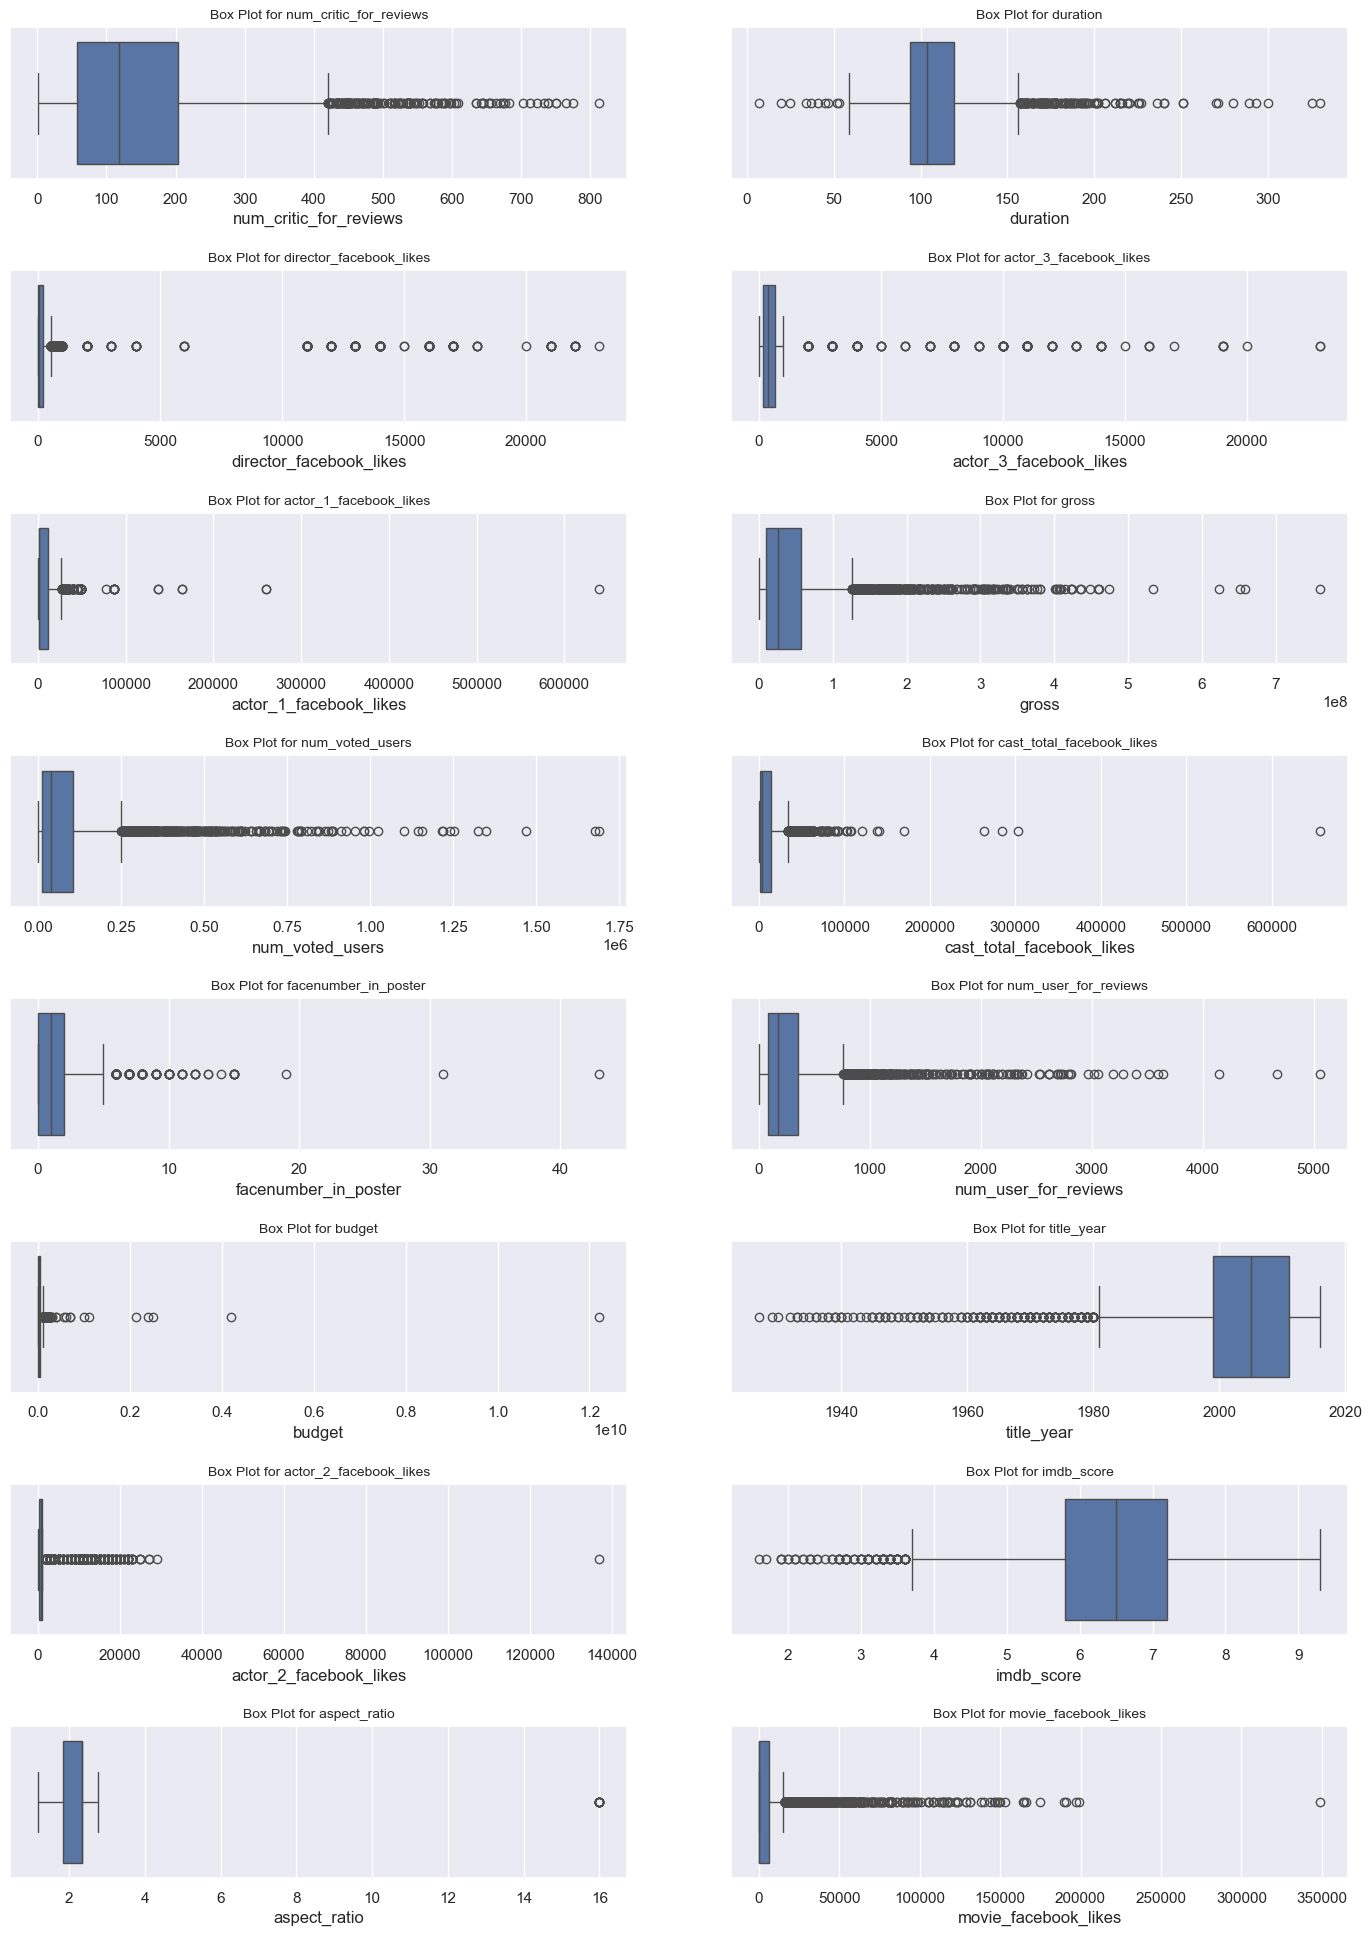

In [98]:
fig, axes = plt.subplots(nrows=8, ncols=2)
fig.set_size_inches(15, 20)
plt.tight_layout(pad=3.50)

axes = axes.flatten()

columns = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes']

# Loop through columns and create box plots
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}', fontsize=10)
    
# Adjust the plot numbers
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.show()


## EDA

In [99]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

### Univariate Analysis

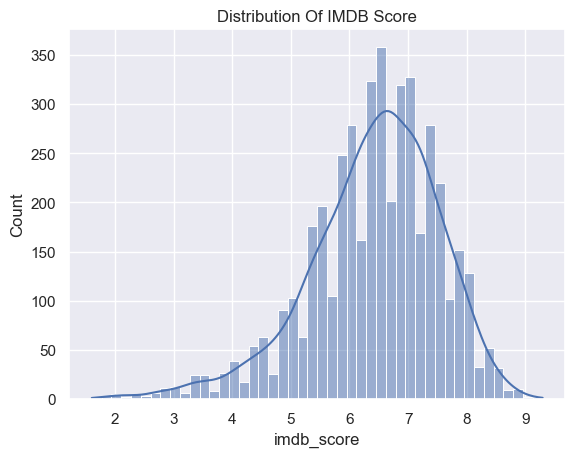

In [100]:
sns.set(style="darkgrid")
sns.histplot(df['imdb_score'], kde=True)
plt.title("Distribution Of IMDB Score")
plt.show()

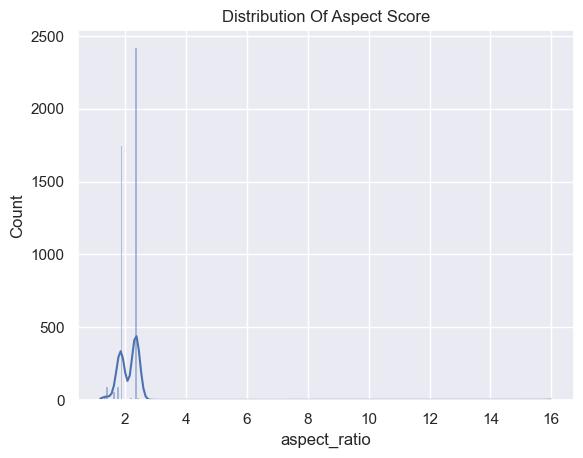

In [101]:
sns.histplot(df['aspect_ratio'], kde=True)
plt.title("Distribution Of Aspect Score")
plt.show()

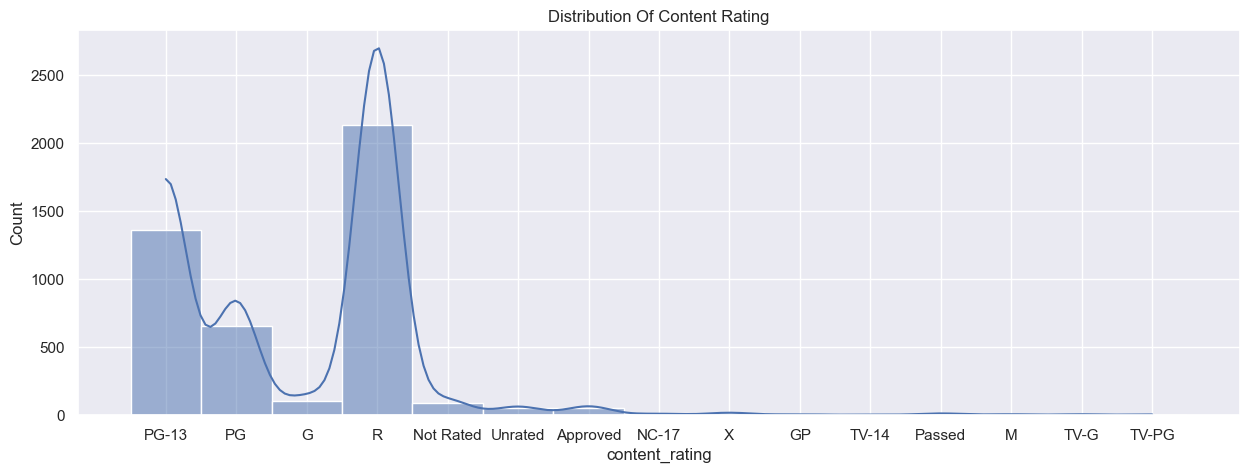

In [102]:
plt.figure(figsize=(15,5))
sns.histplot(df['content_rating'], kde=True)
plt.title("Distribution Of Content Rating")
plt.show()

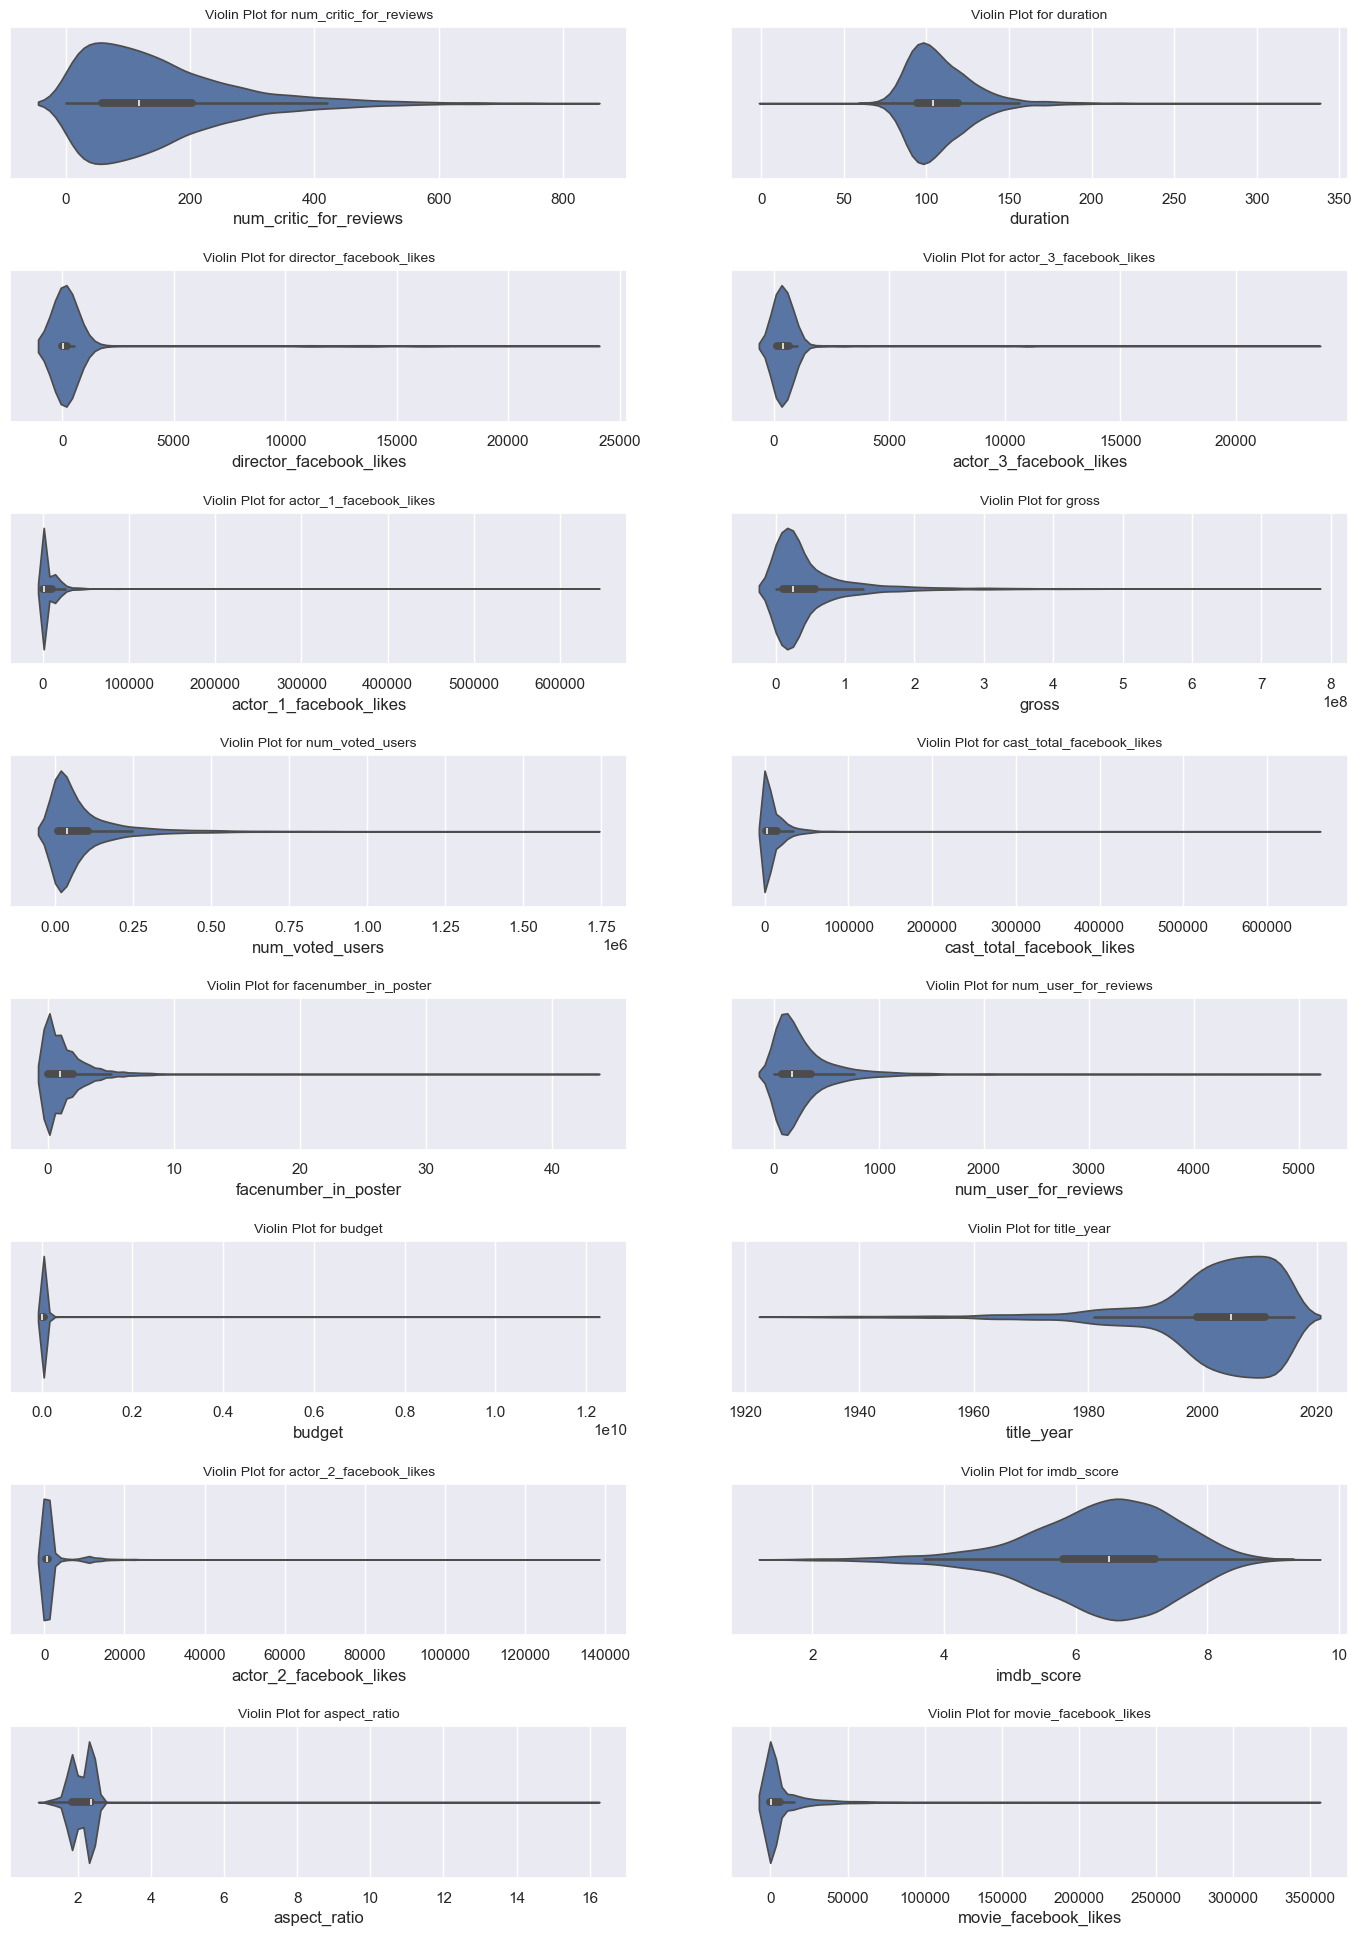

In [103]:
fig, axes = plt.subplots(nrows=8, ncols=2)
fig.set_size_inches(15, 20)
plt.tight_layout(pad=3.50)

axes = axes.flatten()

columns = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes']

# Loop through columns and create box plots
for i, col in enumerate(columns):
    sns.violinplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Violin Plot for {col}', fontsize=10)
    
# Adjust the plot numbers
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.show()


### Bivariate Analysis

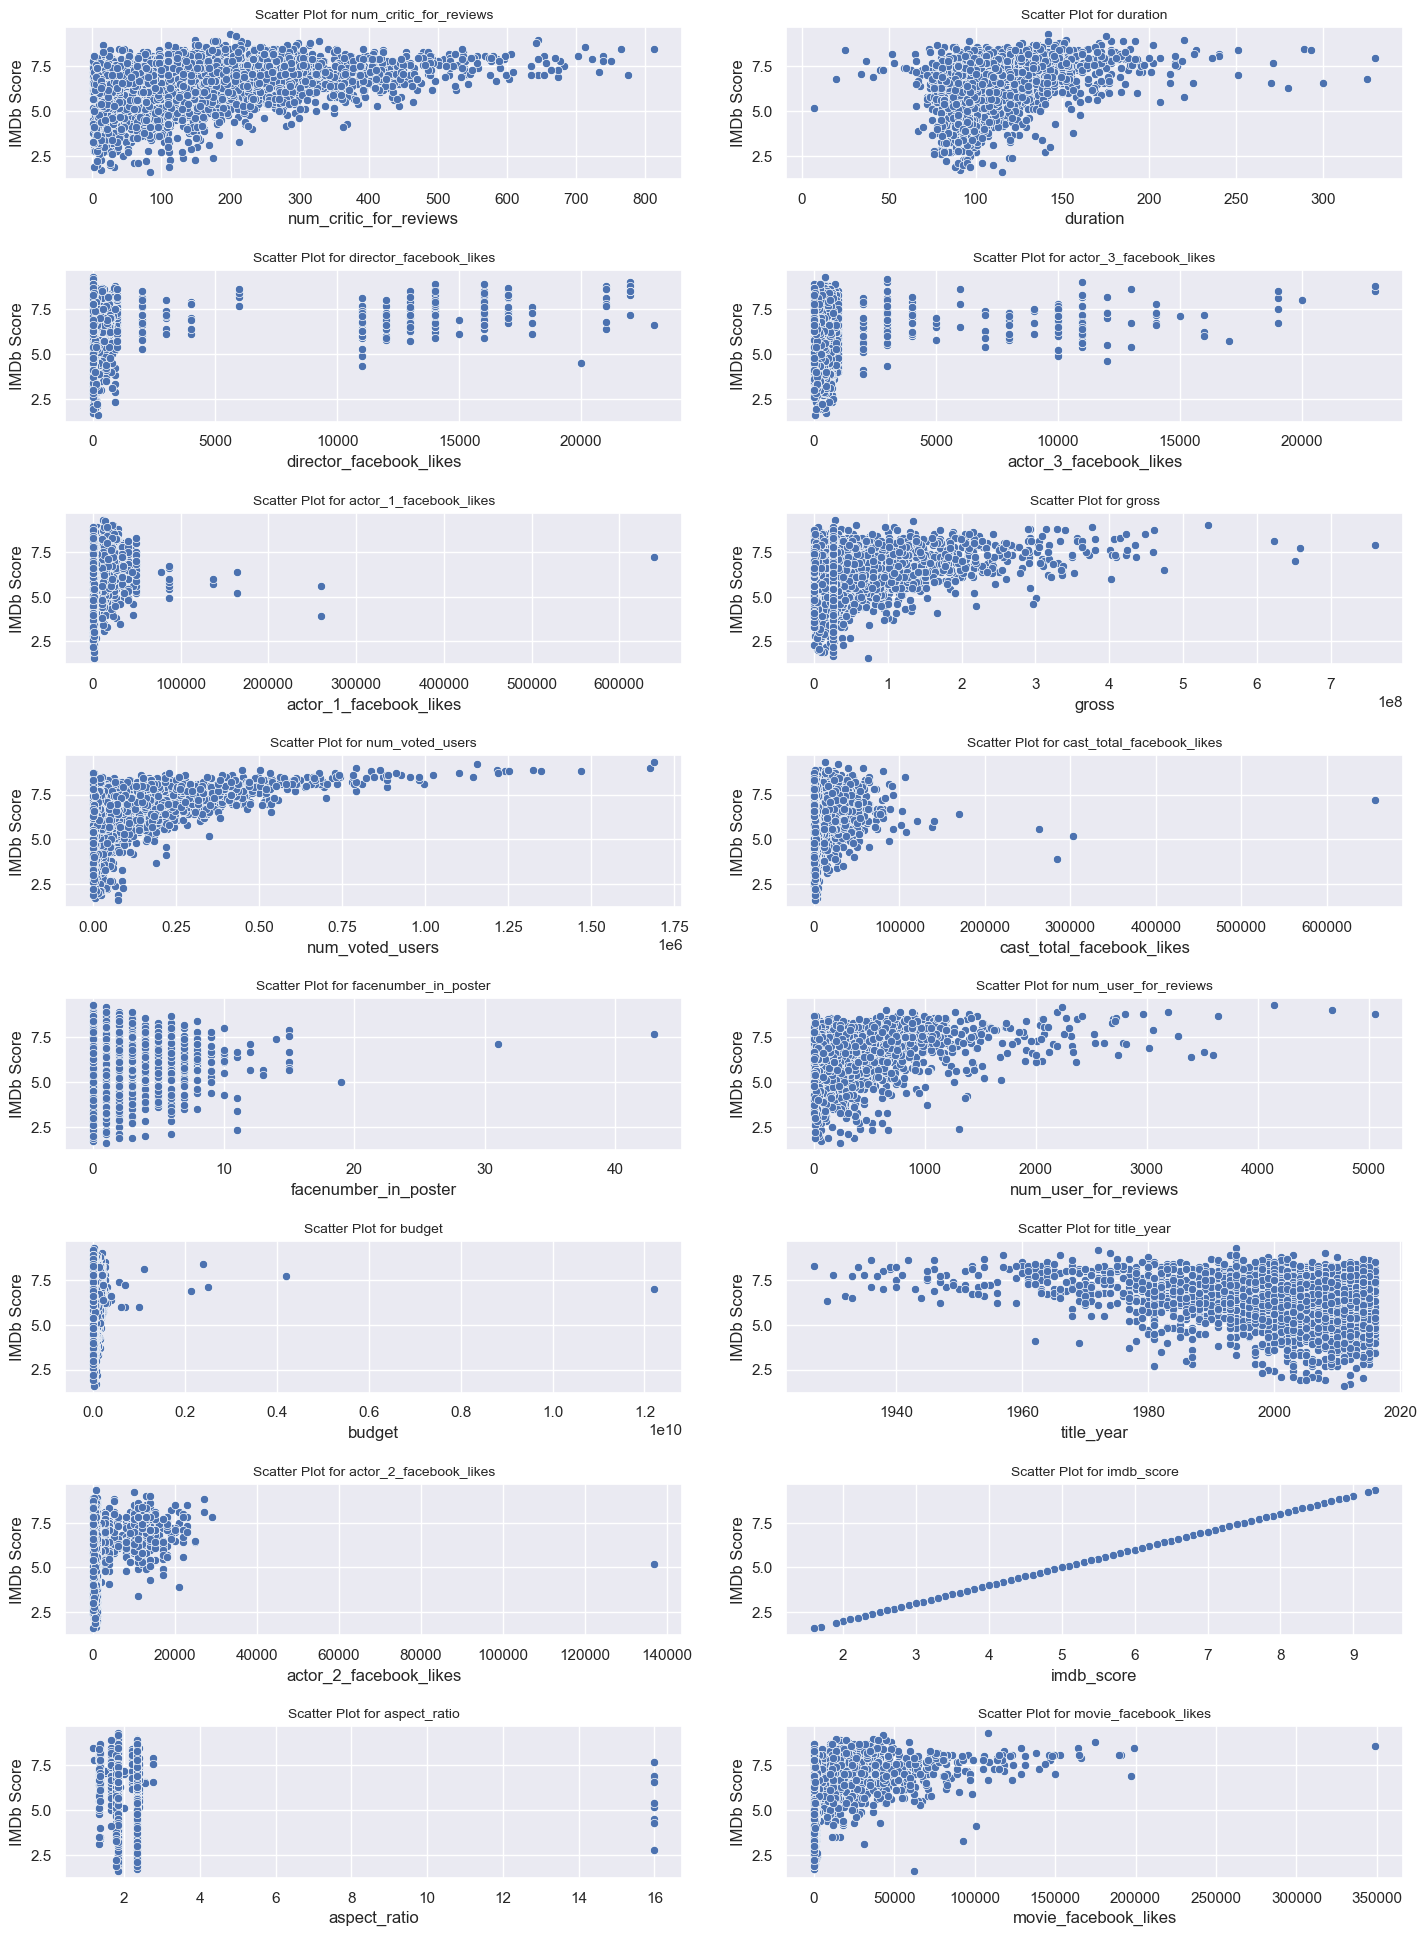

In [104]:
fig, axes = plt.subplots(nrows=8, ncols=2)
fig.set_size_inches(15, 20)
plt.tight_layout(pad=3.50)

axes = axes.flatten()

columns = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
           'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
           'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
           'num_user_for_reviews', 'budget', 'title_year',
           'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
           'movie_facebook_likes']

# Loop through columns and create scatter plots
for i, col in enumerate(columns):
    sns.scatterplot(x=col, y='imdb_score', data=df, ax=axes[i])
    axes[i].set_title(f'Scatter Plot for {col}', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('IMDb Score')

# Adjust the plot numbers
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

plt.show()


In [105]:
df.shape

(4477, 26)

In [106]:
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
5  Color     Andrew Stanton                   462.0     132.0   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
5                    475.0                   530.0   Samantha Morton   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
5                   640.0   73058679.0          Action|Adventure|Sci-Fi   

      actor_1_name                                movie_title  \
0      CCH Pounder                                    Avatar    
1      Johnny Depp  Pirates of the Caribbean: At World's End    
2  Christoph Waltz                                   Spectre    
3        Tom Hardy                     The Dark Knight Rises    
5     Daryl Sabara                               John Carter    

   num_voted_users  cast_total_facebook_likes          actor_3_name  \
0         886204.0                     4834.0             Wes Studi   
1         471220.0                    48350.0        Jack Davenport   
2         275868.0                    11700.0      Stephanie Sigman   
3        1144337.0                   106759.0  Joseph Gordon-Levitt   
5         212204.0                     1873.0          Polly Walker   

   facenumber_in_poster  num_user_for_reviews language country content_rating  \
0                   0.0                3054.0  English     USA          PG-13   
1                   0.0                1238.0  English     USA          PG-13   
2                   1.0                 994.0  English      UK          PG-13   
3                   0.0                2701.0  English     USA          PG-13   
5                   1.0                 738.0  English     USA          PG-13   

        budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  \
0  237000000.0      2009.0                   936.0         7.9          1.78   
1  300000000.0      2007.0                  5000.0         7.1          2.35   
2  245000000.0      2015.0                   393.0         6.8          2.35   
3  250000000.0      2012.0                 23000.0         8.5          2.35   
5  263700000.0      2012.0                   632.0         6.6          2.35   

   movie_facebook_likes  
0               33000.0  
1                   0.0  
2               85000.0  
3              164000.0  
5               24000.0

In [107]:
df.to_csv('IMDB_Score_CleanedData.csv', index=False)